In [77]:
import serial
import numpy as np

In [78]:
# Connect to Arduino
arduino_port = 'COM4'  # Change 'COMX' to the appropriate port
baud_rate = 9600
arduino = serial.Serial(arduino_port, baud_rate)

In [84]:
# Define parameters for preprocessing and feature extraction
window_size = 50  # Adjust window size as needed
moving_average_window = 100  # Adjust moving average window size as needed

In [85]:
# Initialize variables for real-time feature extraction
integrated_emg = []
mav = []
ssi = []
rms = []
variance = []
wl = []
zcr = []

In [86]:
def preprocess_emg(emg_data):
    # Zero-centering
    emg_data -= np.mean(emg_data)
    
    # Rectification
    #emg_data = np.abs(emg_data)
    
    # Squaring
    #emg_data = np.square(emg_data)
    
    # Moving average
    #emg_data = np.convolve(emg_data, np.ones(moving_average_window)/moving_average_window, mode='valid')
    
    return emg_data

In [87]:
def extract_features(emg_data):
    integrated_emg.append(np.sum(emg_data))
    mav.append(np.mean(np.abs(emg_data)))
    ssi.append(np.sum(np.square(emg_data)))
    rms.append(np.sqrt(np.mean(np.square(emg_data))))
    variance.append(np.var(emg_data))
    wl.append(np.sum(np.abs(np.diff(emg_data))))
    zc_count = len(np.where(np.diff(np.sign(emg_data)))[0])
    zcr.append(zc_count / len(emg_data))

In [88]:
# Main loop for real-time processing
while True:
    # Read EMG data from Arduino
    emg_data = arduino.readline().strip().split(b',')
    emg_data = [int(x) for x in emg_data]
    
    # Perform preprocessing
    preprocessed_emg = preprocess_emg(emg_data)
    
    # Extract features in temporal batches
    if len(preprocessed_emg) >= window_size:
        emg_window = preprocessed_emg[-window_size:]
        extract_features(emg_window)
        
        # Print real-time feature extraction results
        print("EMG DATA:",emg_data)
        print("IEMG:", integrated_emg[-1])
        print("MAV:", mav[-1])
        print("SSI:", ssi[-1])
        print("RMS:", rms[-1])
        print("VAR:", variance[-1])
        print("WL:", wl[-1])
        print("ZCR:", zcr[-1])
        print('')

KeyboardInterrupt: 

In [74]:
import numpy as np
import time

# Simulate real-time EMG signal generation
def generate_emg():
    while True:
        emg_data = np.random.rand(100) * 10  # Simulate EMG signal (100 samples)
        yield emg_data
        time.sleep(0.1)  # Simulate real-time data acquisition delay

# Parameters for preprocessing and feature extraction
window_size = 100
moving_average_window = 100

# Initialize variables for real-time feature extraction
integrated_emg = []
mav = []
ssi = []
rms = []
variance = []
wl = []
zcr = []

def preprocess_emg(emg_data):
    # Zero-centering
    emg_data -= np.mean(emg_data)
    
    # Rectification
    emg_data = np.abs(emg_data)
    
    # Squaring
    emg_data = np.square(emg_data)
    
    # Moving average
    emg_data = np.convolve(emg_data, np.ones(moving_average_window)/moving_average_window, mode='valid')
    
    return emg_data

def extract_features(emg_data):
    integrated_emg.append(np.sum(emg_data))
    mav.append(np.mean(np.abs(emg_data)))
    ssi.append(np.sum(np.square(emg_data)))
    rms.append(np.sqrt(np.mean(np.square(emg_data))))
    variance.append(np.var(emg_data))
    wl.append(np.sum(np.abs(np.diff(emg_data))))
    zc_count = len(np.where(np.diff(np.sign(emg_data)))[0])
    zcr.append(zc_count / len(emg_data))

# Main loop for real-time processing
emg_generator = generate_emg()
for i in range(100):  # Process 100 time steps
    emg_data = next(emg_generator)
    
    # Perform preprocessing
    preprocessed_emg = preprocess_emg(emg_data)
    
    # Extract features in temporal batches
    if len(preprocessed_emg) >= window_size:
        emg_window = preprocessed_emg[-window_size:]
        extract_features(emg_window)
        
        # Print real-time feature extraction results
        print("IEMG:", integrated_emg[-1])
        print("MAV:", mav[-1])
        print("SSI:", ssi[-1])
        print("RMS:", rms[-1])
        print("VAR:", variance[-1])
        print("WL:", wl[-1])
        print("ZCR:", zcr[-1])
        print(' ')

IEMG: 841.7382377104359
MAV: 8.417382377104358
SSI: 7112.853032711206
RMS: 8.433773196328678
VAR: 0.27620424472501903
WL: 7.967808078831338
ZCR: 0.0
 
IEMG: 761.91227262198
MAV: 7.619122726219801
SSI: 5861.549773517684
RMS: 7.656075870521192
VAR: 0.5644666179777961
WL: 8.347128437290557
ZCR: 0.0
 
IEMG: 933.218185123076
MAV: 9.332181851230759
SSI: 8719.809040953787
RMS: 9.33799177604788
VAR: 0.10847230509713665
WL: 8.985575293506791
ZCR: 0.0
 
IEMG: 853.1687208689457
MAV: 8.531687208689457
SSI: 7290.898705027718
RMS: 8.538675954167436
VAR: 0.11930042336190427
WL: 7.540057635801837
ZCR: 0.0
 
IEMG: 824.8224958801176
MAV: 8.248224958801176
SSI: 6807.040551060926
RMS: 8.250479107943324
VAR: 0.03719053961860059
WL: 9.659788186261352
ZCR: 0.0
 
IEMG: 765.3988757913222
MAV: 7.653988757913222
SSI: 5865.182079095122
RMS: 7.65844767501556
VAR: 0.06827688468923783
WL: 8.197987952805953
ZCR: 0.0
 
IEMG: 884.6694107151327
MAV: 8.846694107151327
SSI: 7901.660301492718
RMS: 8.889128360808341
VAR: 0.

IEMG: 935.0214969804302
MAV: 9.350214969804302
SSI: 8749.468848093276
RMS: 9.35385954998966
VAR: 0.06816849938030076
WL: 9.588217941511886
ZCR: 0.0
 
IEMG: 893.2286999692305
MAV: 8.932286999692305
SSI: 8015.467928596646
RMS: 8.952914569343687
VAR: 0.3689282410942852
WL: 9.271758653475034
ZCR: 0.0
 
IEMG: 851.4929748670736
MAV: 8.514929748670736
SSI: 7256.593132881521
RMS: 8.518563924090445
VAR: 0.06190270401731375
WL: 8.82614812900809
ZCR: 0.0
 
IEMG: 777.9227093605431
MAV: 7.779227093605431
SSI: 6069.073512974944
RMS: 7.790425863182926
VAR: 0.17436095586462538
WL: 8.585656329687525
ZCR: 0.0
 
IEMG: 806.9788639267126
MAV: 8.069788639267125
SSI: 6554.709537902557
RMS: 8.096116067536679
VAR: 0.4256066965807985
WL: 8.516624646238071
ZCR: 0.0
 
IEMG: 848.7599233307296
MAV: 8.487599233307296
SSI: 7251.588128639946
RMS: 8.51562571314636
VAR: 0.476540541160875
WL: 9.53405952597446
ZCR: 0.0
 
IEMG: 841.6460198057727
MAV: 8.416460198057727
SSI: 7137.3334383144565
RMS: 8.448274047587741
VAR: 0.5

KeyboardInterrupt: 

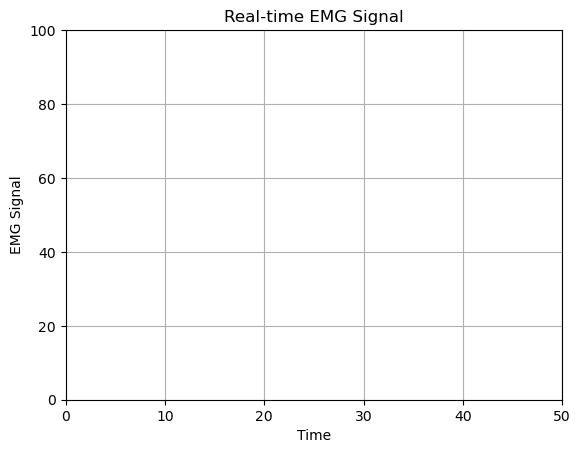

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

# Simulate real-time EMG signal generation
def generate_emg():
    while True:
        emg_data = np.random.rand(100) * 10  # Simulate EMG signal (100 samples)
        yield emg_data
        time.sleep(0.1)  # Simulate real-time data acquisition delay

# Parameters for preprocessing and feature extraction
window_size = 50
moving_average_window = 100

# Initialize variables for real-time feature extraction
integrated_emg = []
mav = []
ssi = []
rms = []
variance = []
wl = []
zcr = []

# Initialize plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(0, 100)
ax.set_xlim(0, window_size)

# Initialize empty lists for storing plot data
x_data = []
y_data = []

def preprocess_emg(emg_data):
    # Zero-centering
    emg_data -= np.mean(emg_data)
    
    # Rectification
    emg_data = np.abs(emg_data)
    
    # Squaring
    emg_data = np.square(emg_data)
    
    # Moving average
    emg_data = np.convolve(emg_data, np.ones(moving_average_window)/moving_average_window, mode='valid')
    
    return emg_data

def extract_features(emg_data):
    integrated_emg.append(np.sum(emg_data))
    mav.append(np.mean(np.abs(emg_data)))
    ssi.append(np.sum(np.square(emg_data)))
    rms.append(np.sqrt(np.mean(np.square(emg_data))))
    variance.append(np.var(emg_data))
    wl.append(np.sum(np.abs(np.diff(emg_data))))
    zc_count = len(np.where(np.diff(np.sign(emg_data)))[0])
    zcr.append(zc_count / len(emg_data))

# Main loop for real-time processing
emg_generator = generate_emg()

def init():
    line.set_data([], [])
    return line,

def update(frame):
    emg_data = next(emg_generator)
    
    # Perform preprocessing
    preprocessed_emg = preprocess_emg(emg_data)
    
    # Extract features in temporal batches
    if len(preprocessed_emg) >= window_size:
        emg_window = preprocessed_emg[-window_size:]
        extract_features(emg_window)
        # Print real-time feature extraction results
        print("IEMG:", integrated_emg[-1])
        print("MAV:", mav[-1])
        print("SSI:", ssi[-1])
        print("RMS:", rms[-1])
        print("VAR:", variance[-1])
        print("WL:", wl[-1])
        print("ZCR:", zcr[-1])
        print(' ')
        
        # Update plot data
        x_data.append(frame)
        y_data.append(emg_window[-1])  # Use the last value of the window
        
        # Update plot
        line.set_data(x_data, y_data)
        return line,

ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True)

plt.xlabel('Time')
plt.ylabel('EMG Signal')
plt.title('Real-time EMG Signal')
plt.grid(True)
plt.show()

In [94]:
import serial
import numpy as np

# Connect to Arduino
arduino_port = 'COM4'  # Change 'COMX' to the appropriate port
baud_rate = 9600
arduino = serial.Serial(arduino_port, baud_rate)

# Define parameters for preprocessing and feature extraction
window_size = 100  # Adjust window size as needed
moving_average_window = 100  # Adjust moving average window size as needed

# Initialize variables for real-time feature extraction
integrated_emg = []
mav = []
ssi = []
rms = []
variance = []
wl = []
zcr = []

def preprocess_emg(emg_data):
    # Convert ASCII-encoded string data to integers
    emg_data = [int(x) for x in emg_data]
    
    # Zero-centering
    emg_data -= np.mean(emg_data)
    
    # Normalize data to have mean 0 and standard deviation 1
    #emg_data -= np.mean(emg_data)
    #emg_data /= np.std(emg_data)
    
    # Rectification
    emg_data = np.abs(emg_data)
    
    # Squaring
    emg_data = np.square(emg_data)
    
    # Moving average
    emg_data = np.convolve(emg_data, np.ones(moving_average_window)/moving_average_window, mode='valid')
    
    return emg_data

def extract_features(emg_data):
    integrated_emg.append(np.sum(emg_data))
    mav.append(np.mean(np.abs(emg_data)))
    ssi.append(np.sum(np.square(emg_data)))
    rms.append(np.sqrt(np.mean(np.square(emg_data))))
    variance.append(np.var(emg_data))
    wl.append(np.sum(np.abs(np.diff(emg_data))))
    zc_count = len(np.where(np.diff(np.sign(emg_data)))[0])
    zcr.append(zc_count / len(emg_data))

# Main loop for real-time processing
while True:
    # Read EMG data from Arduino (decoded as ASCII)
    emg_data = arduino.readline().decode('ascii').strip().split(',')
    
    # Perform preprocessing
    preprocessed_emg = preprocess_emg(emg_data)
    
    # Extract features in temporal batches
    if len(preprocessed_emg) >= window_size:
        emg_window = preprocessed_emg[-window_size:]
        extract_features(emg_window)
        
        # Print real-time feature extraction results
        print(emg_data)
        print("Integrated EMG:", integrated_emg[-1])
        print("Mean Absolute Value:", mav[-1])
        print("Simple Square Integral:", ssi[-1])
        print("Root Mean Square:", rms[-1])
        print("Variance:", variance[-1])
        print("Waveform Length:", wl[-1])
        print("Zero-crossing Rate:", zcr[-1])
        print(" ")


['498']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['509']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['495']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['469']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['441']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['429']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['434']
Integrat

['454']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['440']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['428']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['431']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['460']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['494']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['514']
Integrat

['432']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['422']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['443']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['463']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['494']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['510']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['505']
Integrat

['426']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['454']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['474']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['501']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['510']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['500']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['474']
Integrat

['477']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['500']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['510']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['492']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['467']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['441']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['438']
Integrat

['484']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['459']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['445']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['424']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['430']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['460']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['495']
Integrat

['436']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['405']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['404']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['443']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['471']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['486']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['485']
Integrat

['473']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['497']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['508']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['504']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['475']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['435']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['411']
Integrat

['502']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['516']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['495']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['481']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['437']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['413']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['418']
Integrat

['504']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['543']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['548']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['512']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['478']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['445']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['424']
Integrat

['497']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['484']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['394']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['383']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['518']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['515']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['549']
Integrat

['621']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['189']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['253']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['231']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['467']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['546']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['756']
Integrat

['153']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['354']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['391']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['738']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['539']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['443']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['475']
Integrat

['499']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['800']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['360']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['397']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['250']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['717']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['786']
Integrat

['579']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['491']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['482']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['490']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['420']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['386']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['424']
Integrat

['393']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['397']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['512']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['380']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['445']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['549']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['549']
Integrat

['515']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['527']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['508']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['485']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['435']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['409']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['411']
Integrat

['475']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['439']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['419']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['426']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['464']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['498']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['528']
Integrat

['468']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['426']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['397']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['423']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['469']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['501']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['510']
Integrat

['485']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['499']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['521']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['514']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['496']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['453']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['406']
Integrat

['456']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['517']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['547']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['499']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['434']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['431']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['407']
Integrat

['469']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['474']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['578']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['562']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['469']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['454']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['435']
Integrat

['36']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['781']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['738']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['649']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['548']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['420']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['262']
Integrate

['524']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['490']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['582']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['473']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['342']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['319']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['127']
Integrat

['624']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['641']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['576']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['476']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['375']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['650']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['0']
Integrated

['519']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['638']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['428']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['414']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['387']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['427']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['434']
Integrat

['514']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['425']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['236']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['375']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['535']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['496']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['564']
Integrat

['420']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['405']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['475']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['478']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['453']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['479']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['539']
Integrat

['389']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['418']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['458']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['492']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['532']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['523']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['482']
Integrat

['498']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['525']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['521']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['476']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['441']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['423']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['412']
Integrat

['523']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['513']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['479']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['440']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['415']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['416']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['449']
Integrat

['511']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['523']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['501']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['474']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['440']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['417']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['422']
Integrat

['499']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['483']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['452']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['433']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['410']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['420']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['451']
Integrat

['433']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['419']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['433']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['466']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['497']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['523']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['512']
Integrat

['521']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['512']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['478']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['445']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['420']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['416']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['442']
Integrat

['403']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['404']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['447']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['470']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['503']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['515']
Integrated EMG: 0.0
Mean Absolute Value: 0.0
Simple Square Integral: 0.0
Root Mean Square: 0.0
Variance: 0.0
Waveform Length: 0.0
Zero-crossing Rate: 0.0
 
['493']
Integrat

KeyboardInterrupt: 